In [50]:
import csv
import tensorflow as tf
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Dropout,SimpleRNN,Flatten,Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import re 
import matplotlib.pyplot as plt

In [2]:
stop_words = stopwords.words("english")
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [3]:
vocab_sz = 5000
embedding_dim = 64
max_length = 200
oov_tok = '<OOV>'
training_portion = 0.8

In [19]:
articles = []
labels = []
with open("bbc-text.csv",'r') as f:
    reader = csv.reader(f,delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for w in stop_words:
            article = article.replace(" " + w + " "," ")
            article = re.sub("\s+"," ",article)
        articles.append(article)

In [20]:
len(articles),len(labels)

(2225, 2225)

In [21]:
print(f"{labels[0]}:\n{articles[0]}")

tech:
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming. people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means te

In [22]:
train_sz = int(training_portion * len(articles))
train_articles = articles[:train_sz]
train_labels = labels[:train_sz]
val_articles = articles[train_sz:]
val_labels = labels[train_sz:]

In [23]:
print('train_articles' ,len(train_articles))
print('train_labels', len(train_labels))
print('validation_articles', len(val_articles))
print('validation_labels', len(val_labels))

train_articles 1780
train_labels 1780
validation_articles 445
validation_labels 445


In [24]:
tokenizer = Tokenizer(num_words=200,oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_idx = tokenizer.word_index

In [31]:
for x, y in zip(list(word_idx)[:200],list(word_idx.values())[:200]):
    print(x,'-->',y)

<OOV> --> 1
said --> 2
mr --> 3
would --> 4
year --> 5
also --> 6
people --> 7
new --> 8
us --> 9
one --> 10
could --> 11
last --> 12
first --> 13
time --> 14
two --> 15
government --> 16
world --> 17
uk --> 18
best --> 19
years --> 20
make --> 21
film --> 22
told --> 23
made --> 24
get --> 25
music --> 26
game --> 27
like --> 28
back --> 29
many --> 30
000 --> 31
labour --> 32
three --> 33
well --> 34
1 --> 35
next --> 36
bbc --> 37
take --> 38
set --> 39
number --> 40
added --> 41
way --> 42
market --> 43
2 --> 44
company --> 45
may --> 46
says --> 47
election --> 48
home --> 49
party --> 50
good --> 51
going --> 52
much --> 53
work --> 54
2004 --> 55
still --> 56
win --> 57
show --> 58
think --> 59
games --> 60
go --> 61
top --> 62
second --> 63
million --> 64
6 --> 65
england --> 66
firm --> 67
since --> 68
week --> 69
say --> 70
play --> 71
part --> 72
public --> 73
use --> 74
blair --> 75
3 --> 76
want --> 77
minister --> 78
however --> 79
10 --> 80
country --> 81
technology --> 

In [32]:
tokenizer.texts_to_sequences(["angels crying in my bed"])

[[1, 1, 1, 1, 1]]

In [34]:
train_seq = tokenizer.texts_to_sequences(train_articles)
len(train_seq)

1780

In [35]:
len(train_seq[0])

426

In [36]:
len(train_seq[1])

192

In [37]:
train_padded = pad_sequences(sequences=train_seq,maxlen=max_length)

In [38]:
len(train_padded[0])

200

In [39]:
len(train_padded[1])

200

In [40]:
val_sequences = tokenizer.texts_to_sequences(val_articles)
val_padded = pad_sequences(val_sequences, maxlen=max_length)

In [41]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [42]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(val_labels))

In [66]:
training_label_seq = training_label_seq - 1 
validation_label_seq = validation_label_seq - 1

In [67]:
model = Sequential()
model.add(Embedding(input_dim=vocab_sz,output_dim=embedding_dim))
model.add(Dropout(0.2))
model.add(SimpleRNN(embedding_dim))
model.add(Dense(units=5,activation='softmax'))

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          320000    
                                                                 
 dropout_4 (Dropout)         (None, None, 64)          0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 328,581
Trainable params: 328,581
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
history = model.fit(train_padded, training_label_seq, epochs=50,
                    validation_data=(val_padded, validation_label_seq),
                    )

Epoch 1/50
56/56 [==============================] - 9s 121ms/step - loss: 1.6143 - accuracy: 0.2343 - val_loss: 1.5996 - val_accuracy: 0.2607
Epoch 2/50
56/56 [==============================] - 6s 110ms/step - loss: 1.5606 - accuracy: 0.3073 - val_loss: 1.5732 - val_accuracy: 0.3079
Epoch 3/50
56/56 [==============================] - 6s 110ms/step - loss: 1.5051 - accuracy: 0.3663 - val_loss: 1.5469 - val_accuracy: 0.3258
Epoch 4/50
56/56 [==============================] - 6s 109ms/step - loss: 1.4329 - accuracy: 0.4539 - val_loss: 1.5352 - val_accuracy: 0.3213
Epoch 5/50
56/56 [==============================] - 6s 109ms/step - loss: 1.3743 - accuracy: 0.4607 - val_loss: 1.5373 - val_accuracy: 0.2989
Epoch 6/50
56/56 [==============================] - 6s 111ms/step - loss: 1.4416 - accuracy: 0.4376 - val_loss: 1.7703 - val_accuracy: 0.1798
Epoch 7/50
56/56 [==============================] - 6s 105ms/step - loss: 1.5548 - accuracy: 0.3146 - val_loss: 1.5567 - val_accuracy: 0.3146
Epoch 

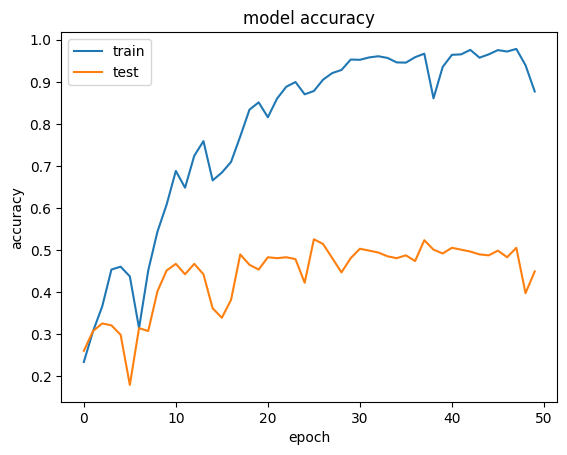

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [78]:
txt = ["call to save manufacturing jobs the trades union congress (tuc) is calling on the government to stem job losses in manufacturing firms by reviewing the help it gives companies.  the tuc said in its submission before the budget that action is needed because of 105 000 jobs lost from the sector over the last year. it calls for better pensions  child care provision and decent wages. the 36-page submission also urges the government to examine support other european countries provide to industry. tuc general secretary brendan barber called for  a commitment to policies that will make a real difference to the lives of working people.    greater investment in childcare strategies and the people delivering that childcare will increases the options available to working parents   he said.  a commitment to our public services and manufacturing sector ensures that we can continue to compete on a global level and deliver the frontline services that this country needs.  he also called for  practical measures  to help pensioners  especially women who he said  are most likely to retire in poverty . the submission also calls for decent wages and training for people working in the manufacturing sector."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

1/1 [==============================] - 0s 53ms/step
[[0.00109962 0.1754673  0.6633092  0.09670184 0.06342191]]
2
business
